# Perceptron (p)

## Imports

In [3]:
import numpy as np
from IPython.display import Image

Le perceptron est l'unité de base des réseaux de neurones. Il s'agit d'un modèle de classification binaire, capable de séparer linéairement 2 classes de points.

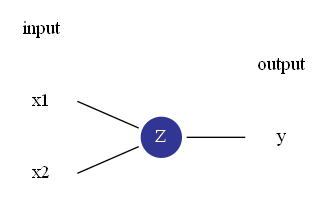

In [4]:
Image(filename='Perceptron.png')

## Modèle Linéaire

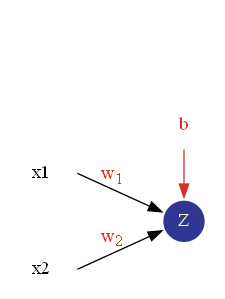

In [5]:
Image(filename='Linear_model.png')

On fournit les variables x1 et x2 à un neurone, en les multipliant chacun par un poids (w1, w2). Un fournit au neurone un coeficient complémentaire (le biais). On obtiens donc : $Z(x_1, x_2) = w_1x_1 + w_2x_2 + b$

$$z=w_1x_1+w_2x_2+b$$  
  
$$\text{Vectorization : } Z=X \cdot W+b$$  
\begin{equation*}
X =
\begin{bmatrix}x_{1}^{(1)} & \dots & x_{n}^{(1)}\\
\vdots & \ddots & \vdots\\
x_{1}^{(m)} & \dots & x_{n}^{(m)}
\end{bmatrix}
\in \mathbb{R}^{m \times n}
\space \space \space \space
W=
\begin{bmatrix}w_{1}\\
\vdots\\
w_{n}
\end{bmatrix}
\in \mathbb{R}^{n \times 1}
\space \space \space \space
b=
\begin{bmatrix}b\\
\vdots\\
b
\end{bmatrix}
\in \mathbb{R}^{m \times 1}
=b \in \mathbb{R}
\end{equation*}